# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 16.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
332368,0.0366,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.1001,0.0024,0.0024,0,0,0,0
167003,0.0244,0.0024,0.0024,0.0024,0.0049,0.0122,0.2319,0.1587,0.0024,0.0562,9,0,8,0
174569,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.2563,0.0757,0.0024,0.0854,8,8,9,9
68374,0.4956,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.4712,0.0024,0.0464,0,0,0,0
192597,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1025,0.0586,0.0024,0.0073,0,0,0,0


In [3]:
raw_data.shape

(456828, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456828 entries, 0 to 456827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456828 non-null  float64
 1   Emg2          456828 non-null  float64
 2   Emg3          456828 non-null  float64
 3   Emg4          456828 non-null  float64
 4   Emg5          456828 non-null  float64
 5   Emg6          456828 non-null  float64
 6   Emg7          456828 non-null  float64
 7   Emg8          456828 non-null  float64
 8   Emg9          456828 non-null  float64
 9   Emg10         456828 non-null  float64
 10  repetition    456828 non-null  int64  
 11  rerepetition  456828 non-null  int64  
 12  stimulus      456828 non-null  int64  
 13  restimulus    456828 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000
mean,0.257678,0.095188,0.119775,0.024560,0.010445,0.027816,0.279186,0.355002,0.052767,0.148996,3.225945,2.036832,5.718159,3.720632
std,0.284347,0.215564,0.396491,0.095231,0.049478,0.072824,0.493694,0.423499,0.179540,0.277385,3.489114,3.183046,6.596319,6.126775
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019500,0.002400,0.002400,0.002400,0.002400,0.002400,0.029300,0.102500,0.002400,0.007300,0.000000,0.000000,0.000000,0.000000
50%,0.178200,0.002400,0.002400,0.002400,0.002400,0.002400,0.117200,0.231900,0.002400,0.053700,2.000000,0.000000,3.000000,0.000000
75%,0.405300,0.058600,0.009800,0.002400,0.002400,0.022000,0.310100,0.434600,0.004900,0.158700,6.000000,4.000000,10.000000,6.000000
max,3.393600,2.702600,4.658200,2.480500,4.660600,2.163100,4.663100,4.665500,3.867200,3.930700,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188839
8      15501
2      15495
12     15493
4      15490
7      15483
1      15467
6      15464
9      15456
11     15453
5      15449
3      15405
10     15405
14     10334
13     10332
17     10327
15     10285
16     10257
21      5181
18      5170
19      5162
22      5130
20      5125
23      5125
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

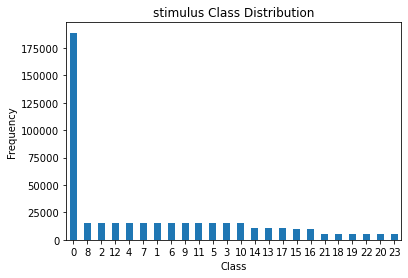

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
232026,0.0171,0.0024,0.0049,0.0024,0.0024,0.0024,0.0317,0.1880,0.0024,0.0293,0,0,0,0
319208,0.1318,0.0024,0.0024,0.0024,0.0024,0.0073,0.0903,0.2075,0.0024,0.0562,0,0,0,0
405860,0.3027,0.0024,0.0024,0.0024,0.0024,0.0024,0.0171,0.1978,0.0024,0.0024,0,0,0,0
262777,0.1050,0.0024,0.0024,0.0024,0.0024,0.0024,0.1709,0.2075,0.0024,0.0269,0,0,0,0
81857,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1709,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(352081, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352081 entries, 0 to 456827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          352081 non-null  float64
 1   Emg2          352081 non-null  float64
 2   Emg3          352081 non-null  float64
 3   Emg4          352081 non-null  float64
 4   Emg5          352081 non-null  float64
 5   Emg6          352081 non-null  float64
 6   Emg7          352081 non-null  float64
 7   Emg8          352081 non-null  float64
 8   Emg9          352081 non-null  float64
 9   Emg10         352081 non-null  float64
 10  repetition    352081 non-null  int64  
 11  rerepetition  352081 non-null  int64  
 12  stimulus      352081 non-null  int64  
 13  restimulus    352081 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.4 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 82.10375335501371


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     37336
           1       0.77      0.77      0.77      2041
           2       0.74      0.76      0.75      1801
           3       0.73      0.73      0.73      1808
           4       0.75      0.76      0.76      1649
           5       0.66      0.69      0.68      1852
           6       0.73      0.73      0.73      1782
           7       0.60      0.63      0.61      2039
           8       0.58      0.62      0.60      1792
           9       0.61      0.63      0.62      1670
          10       0.72      0.72      0.72      1657
          11       0.68      0.70      0.69      1863
          12       0.71      0.69      0.70      1955
          13       0.77      0.76      0.76      1339
          14       0.66      0.68      0.67      1283
          15       0.74      0.74      0.74      1165
          16       0.76      0.74      0.75      1370
 

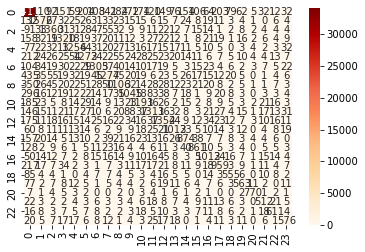

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.3933851200704375
MSE: 15.665364897680957
RMSE: 3.957949582508721


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8225370187993577
Recall Score :  0.8210375335501371
f1_score :  0.821725567703211


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 86.91509152619396


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     37336
           1       0.84      0.84      0.84      2041
           2       0.85      0.80      0.82      1801
           3       0.84      0.77      0.80      1808
           4       0.84      0.83      0.84      1649
           5       0.79      0.70      0.74      1852
           6       0.83      0.80      0.82      1782
           7       0.78      0.65      0.71      2039
           8       0.79      0.63      0.70      1792
           9       0.77      0.63      0.70      1670
          10       0.85      0.74      0.79      1657
          11       0.84      0.75      0.79      1863
          12       0.80      0.72      0.76      1955
          13       0.88      0.80      0.83      1339
          14       0.81      0.70      0.75      1283
          15       0.88      0.78      0.83      1165
          16       0.90      0.79      0.85      1370
 

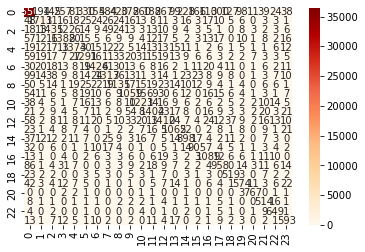

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.0634505872161553
MSE: 12.371913032364343
RMSE: 3.51737303002743


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8659818930925273
Recall Score :  0.8691509152619395
f1_score :  0.8649718390964822


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 91.15838504906486


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     37336
           1       0.93      0.87      0.90      2041
           2       0.94      0.87      0.90      1801
           3       0.93      0.82      0.87      1808
           4       0.94      0.89      0.91      1649
           5       0.89      0.79      0.84      1852
           6       0.91      0.88      0.89      1782
           7       0.86      0.73      0.79      2039
           8       0.89      0.70      0.79      1792
           9       0.88      0.71      0.79      1670
          10       0.92      0.82      0.87      1657
          11       0.90      0.83      0.86      1863
          12       0.90      0.82      0.86      1955
          13       0.93      0.87      0.90      1339
          14       0.87      0.79      0.82      1283
          15       0.94      0.83      0.88      1165
          16       0.95      0.88      0.91      1370
 

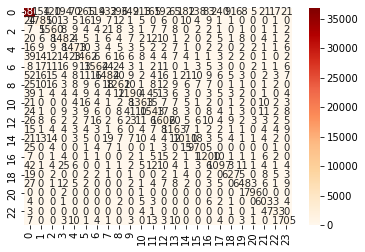

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.7274521777411704
MSE: 8.36949884260903
RMSE: 2.893008614333706


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9112332683977166
Recall Score :  0.9115838504906486
f1_score :  0.9093218694967953


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\nafem\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 85.90539216382408


Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     37336
           1       0.84      0.79      0.81      2041
           2       0.83      0.75      0.79      1801
           3       0.84      0.73      0.79      1808
           4       0.86      0.77      0.81      1649
           5       0.76      0.65      0.70      1852
           6       0.77      0.78      0.77      1782
           7       0.73      0.59      0.66      2039
           8       0.73      0.55      0.63      1792
           9       0.77      0.61      0.68      1670
          10       0.86      0.74      0.80      1657
          11       0.76      0.70      0.73      1863
          12       0.78      0.68      0.72      1955
          13       0.85      0.78      0.82      1339
          14       0.77      0.70      0.74      1283
          15       0.84      0.77      0.80      1165
          16       0.85      0.77      0.81      1370
 

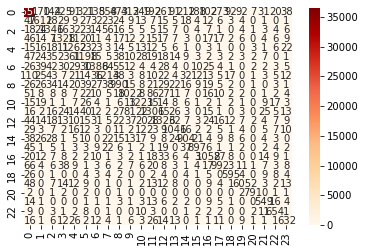

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.1001604726131473
MSE: 12.508513569166537
RMSE: 3.5367377014936427


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8541899432536187
Recall Score :  0.8590539216382408
f1_score :  0.8539979049758201


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 91.79459505517133


Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     37336
           1       0.94      0.88      0.91      2041
           2       0.95      0.87      0.91      1801
           3       0.94      0.83      0.88      1808
           4       0.95      0.91      0.93      1649
           5       0.92      0.81      0.86      1852
           6       0.93      0.89      0.91      1782
           7       0.88      0.75      0.81      2039
           8       0.91      0.71      0.80      1792
           9       0.90      0.74      0.81      1670
          10       0.94      0.83      0.88      1657
          11       0.93      0.85      0.89      1863
          12       0.91      0.83      0.87      1955
          13       0.96      0.89      0.92      1339
          14       0.88      0.79      0.83      1283
          15       0.95      0.85      0.89      1165
          16       0.97      0.89      0.93      1370
 

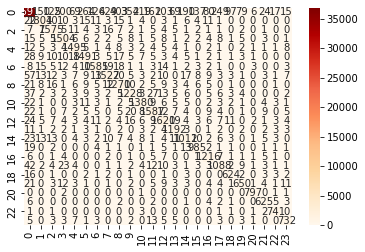

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6984534984449777
MSE: 8.138673899768522
RMSE: 2.8528361151262303


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9184558266050051
Recall Score :  0.9179459505517134
f1_score :  0.9159334808583355
